# Explore flight delay data wrt day of week

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('white')

### Load data

In [2]:
from flightdelay.fld import io as flio
airlines_df, airports_df, flights_df = flio.load_data()

### Restrict analysis to airports with at least 20 flights/day

In [3]:
# Find all unique airports
all_airports, airport_inverse, airport_count = np.unique(flights_df['ORIGIN_AIRPORT'],return_counts=True,return_inverse=True)

# Determine number of flights for the origin airport
Nflights_orig = np.zeros(len(airport_inverse))
for i in range(len(all_airports)):
    Nflights_orig[np.where(airport_inverse==i)] = airport_count[i]
    
flights_df = flights_df.loc[flights_df.index[Nflights_orig>=7300]]

### Remove cancelled flights

In [4]:
# Filter data to columns of interest (others have NaNs)
keys_keep = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']
flights_df = flights_df[keys_keep]

flights_df = flights_df.dropna()
flights_df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


### Separate data by airport

In [5]:
all_airports = np.unique(flights_df['ORIGIN_AIRPORT'])
airport_dfs = {}
for k in all_airports:
    airport_dfs[k] = flights_df[flights_df['ORIGIN_AIRPORT']==k]

# 1. Annual trends in flight delay

In [12]:
# Compute mean flight delay for each month by airport
dft = flights_df[['ORIGIN_AIRPORT','MONTH','DEPARTURE_DELAY']]
dfgb = dft.groupby(['ORIGIN_AIRPORT','MONTH'])
df_mean_by_apmonth = dfgb.agg(['mean','sem'])

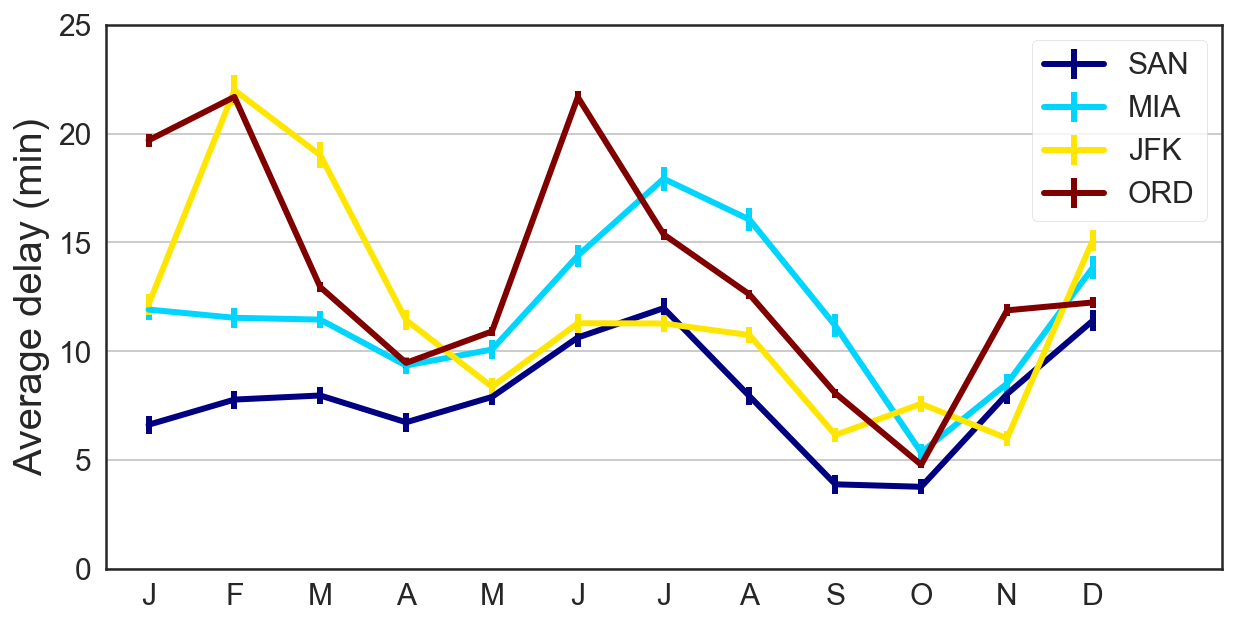

In [53]:
# Plot mean flight delay for many airports
plt.figure(figsize=(10,5))  
aps = ['SAN','MIA','JFK','ORD']
for i, ap in enumerate(aps):
    means = df_mean_by_apmonth.loc[ap]['DEPARTURE_DELAY']['mean'].values
    sems = df_mean_by_apmonth.loc[ap]['DEPARTURE_DELAY']['sem'].values
    plt.errorbar(np.arange(1,13),means,yerr=sems,
             color=colors[i],label=ap,linewidth=3)
             
plt.ylabel('Average delay (min)', size=20)
plt.xlim((.5,13.5))
plt.yticks(np.arange(0,30,5), size=15)
plt.xticks(np.arange(1,13),['J','F','M','A','M','J','J','A','S','O','N','D'],size=15)
plt.legend(loc='best',fontsize=15,frameon=True)

ax = plt.gca()
ax.grid(True)
for line in ax.get_xgridlines():
    line.set_linewidth(0)
for line in ax.get_ygridlines():
    line.get_ydata
    line.set_linewidth(1)

# 2. Weekly trends in flight delay

/Users/scott/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


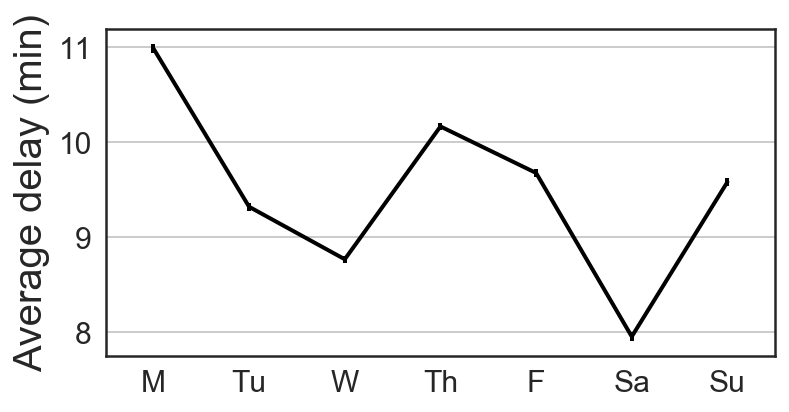

In [54]:
dft = flights_df[['DAY_OF_WEEK','DEPARTURE_DELAY']]
dfgb = dft.groupby('DAY_OF_WEEK')
df_mean_by_day = dfgb.agg(['mean','sem'])

plt.figure(figsize=(6,3))  
means = df_mean_by_day['DEPARTURE_DELAY']['mean'].values
sems = df_mean_by_day['DEPARTURE_DELAY']['sem'].values
plt.errorbar(np.arange(1,8),means,yerr=sems,linewidth=2,color='k')

plt.ylabel('Average delay (min)', size=20)
plt.xlim((.5,7.5))
plt.yticks(np.arange(8,12,1), size=15)
plt.xticks(np.arange(1,8),['M','Tu','W','Th','F','Sa','Su'],size=15)
plt.legend(loc='best',fontsize=15,frameon=True)

ax = plt.gca()
ax.grid(True)
for line in ax.get_xgridlines():
    line.set_linewidth(0)
for line in ax.get_ygridlines():
    line.get_ydata
    line.set_linewidth(1)